# ***INICIAL***

In [39]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
#IMPORTANDO O DATASET
df = pd.read_csv(r"/workspaces/vexpenses/Dataset.csv")

# ***ANÁLISE EXPLORATORIA***

Buscar entender possíveis problemas do dataframe, soluções para esses problemas e uma posterior análise exploratória dos dados.

## *Sumário:*
*1 - Análise Exploratória* 

    1.1 - Problema de valores sem sentido
    1.2 - Problema dos NaN
    1.3 - Tratando algumas colunas
    1.4 - Visualizando as distribuições dos dados e suas correlações.

In [3]:
#Observando possíveis incongruências nas variáveis quantitativas
df.describe()

,Idade,Renda Anual (em $),Tempo no Site (min),Compra (0 ou 1)
count,190.000000,189.000000,200.000000,200.000000
mean,38.510526,58253.968254,17.349090,0.330000
std,12.679918,25612.061811,7.724088,0.471393
min,18.000000,30000.000000,-1.000000,0.000000
25%,28.000000,30000.000000,10.860240,0.000000
50%,38.000000,50000.000000,18.197552,0.000000
75%,50.000000,70000.000000,23.887341,1.000000
max,59.000000,100000.000000,29.853484,1.000000


A primeira coisa que chama atenção é o tempo no site poder ser um valor negativo, não parece fazer sentido.

In [4]:
df[df['Tempo no Site (min)'] <= 0]

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
107,NaN,50000.0,Masculino,-1.0,Sim,0
116,40.0,30000.0,Masculino,-1.0,Sim,0
132,NaN,50000.0,Masculino,-1.0,NaN,0
133,20.0,NaN,NaN,-1.0,Sim,0
147,54.0,70000.0,Masculino,-1.0,Sim,1


5 usuários apresentam algum problema na hora da coleta dos dados. Frente a isso será necessário retirar esses usuários da base.

Optei por descartar essas linhas por não ter mais informações. Caso fosse possível analisar o pipeline de coleta dos dados seria possível determinar se é um erro que afeta apenas a coluna de tempo no site, ou se trata de algum problema mais grave que inutiliza a totalidade dos dados coletados desse usuários. Afim de evitar um possível viés ao imputar esses valores decidi por retirá-los na sua totalidade. 

In [5]:
#Retirando as linhas com tempo no site negativo e igual a 0
df_limpa = df.copy()
df_limpa = df_limpa[df_limpa['Tempo no Site (min)'] >= 0]

df_limpa

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1
...,...,...,...,...,...,...
195,19.0,30000.0,Masculino,29.390255,NaN,1
196,NaN,50000.0,Feminino,21.024302,Sim,0
197,54.0,30000.0,Feminino,25.562014,Não,1
198,22.0,50000.0,NaN,8.313117,Não,0


De relance nota-se que deve haver uma quantidade relevante de colunas com valores NaN

In [6]:
#Vendo quais linhas tem NaN, quantas são e possíveis soluções
print(f"Há um total de {len(df_limpa[df_limpa.isna().any(axis=1)])} linhas com NaN")
df_limpa[df_limpa.isna().any(axis=1)]

Há um total de 30 linhas com NaN


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
100,37.0,70000.0,Masculino,22.378614,NaN,0
101,NaN,30000.0,Feminino,15.107969,Sim,0
102,28.0,NaN,Masculino,15.704990,Não,0
112,31.0,70000.0,Masculino,7.141456,NaN,0
114,35.0,30000.0,Feminino,9.796683,NaN,1
122,NaN,50000.0,Feminino,10.842802,Não,0
124,NaN,30000.0,Feminino,27.001977,Sim,0
126,23.0,30000.0,NaN,18.323945,Não,0
129,39.0,NaN,Masculino,21.737174,NaN,1
131,NaN,30000.0,Feminino,21.545980,Não,1


Os valores ausentes estão distribuídos por todo o dataframe menos na coluna alvo (Compra).

Não há necessidade de descartar esses valores de imediato, existe a possibilidade de imputar esses valores ausentes utilizando de modelos não supervisionados como KNN.

O descarte desses valores de forma imediata e indiscriminada pode gerar uma perda significativa de dados. Já que as linhas com valores ausentes representam 15% do dataframe. Há de se fazer um teste usando dados imputados

Colunas como Anúncio Clicado e Gênero poderiam estar em binário para serem utilizadas no modelo. Afim de não aumentar a dimensionalidade do problema transformei a coluna Gênero na coluna Masculino, se for Masculino = 1, se não 0.

In [7]:
df_limpa['Anúncio Clicado'] = df_limpa['Anúncio Clicado'].replace({"Sim": 1, "Não":0})

df_limpa['Masculino'] = df_limpa['Gênero'].replace({"Masculino":1,"Feminino":0})

df_limpa = df_limpa.drop(columns=['Gênero'])
df_limpa

/tmp/ipykernel_1940/1379505435.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpa['Anúncio Clicado'] = df_limpa['Anúncio Clicado'].replace({"Sim": 1, "Não":0})
/tmp/ipykernel_1940/1379505435.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpa['Masculino'] = df_limpa['Gênero'].replace({"Masculino":1,"Feminino":0})


,Idade,Renda Anual (em $),Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1),Masculino
0,29.0,30000.0,5.741706,0.0,0,0.0
1,58.0,50000.0,21.885505,1.0,0,0.0
2,50.0,70000.0,6.121339,0.0,1,0.0
3,21.0,100000.0,16.264925,0.0,0,0.0
4,59.0,50000.0,28.235667,1.0,1,0.0
...,...,...,...,...,...,...
195,19.0,30000.0,29.390255,NaN,1,1.0
196,NaN,50000.0,21.024302,1.0,0,0.0
197,54.0,30000.0,25.562014,0.0,1,0.0
198,22.0,50000.0,8.313117,0.0,0,NaN


In [8]:
df

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1
...,...,...,...,...,...,...
195,19.0,30000.0,Masculino,29.390255,NaN,1
196,NaN,50000.0,Feminino,21.024302,Sim,0
197,54.0,30000.0,Feminino,25.562014,Não,1
198,22.0,50000.0,NaN,8.313117,Não,0


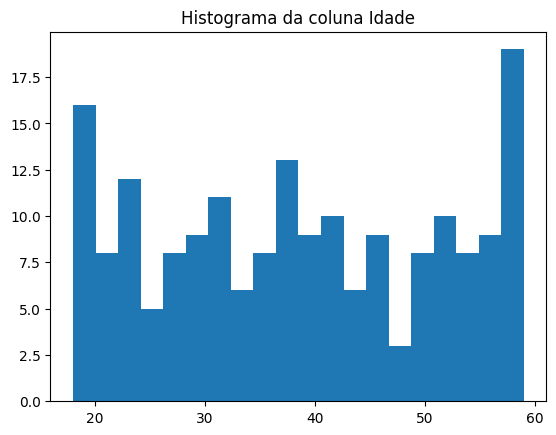

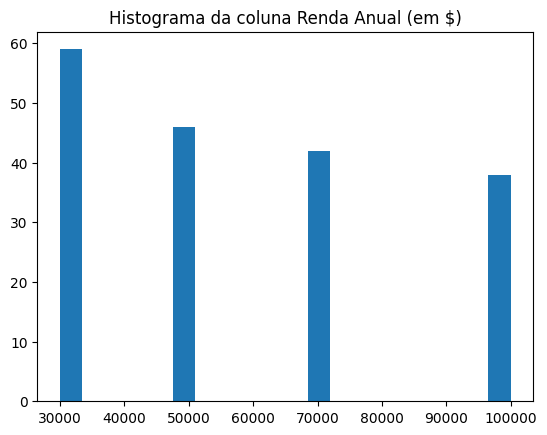

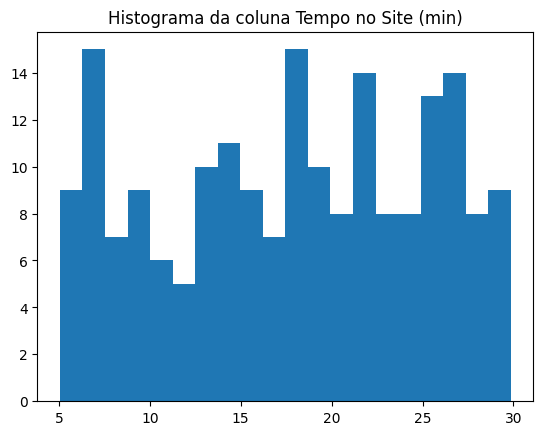

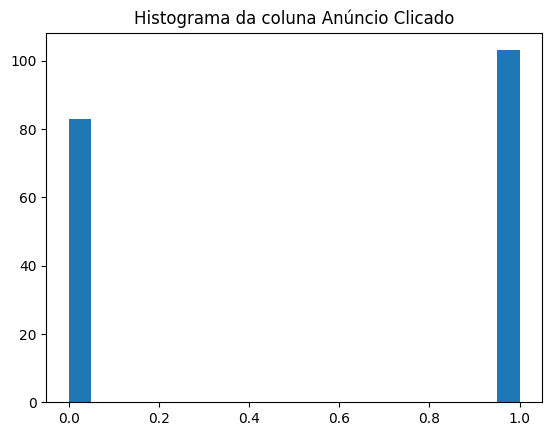

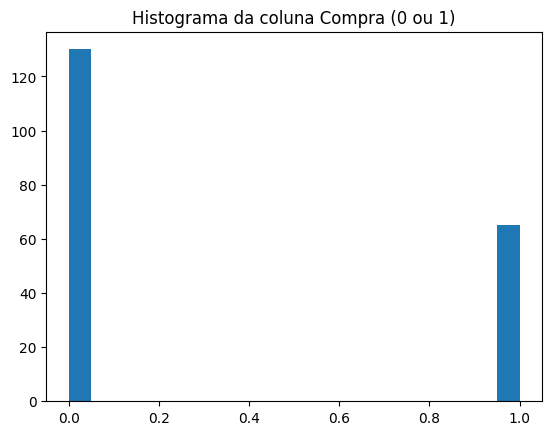

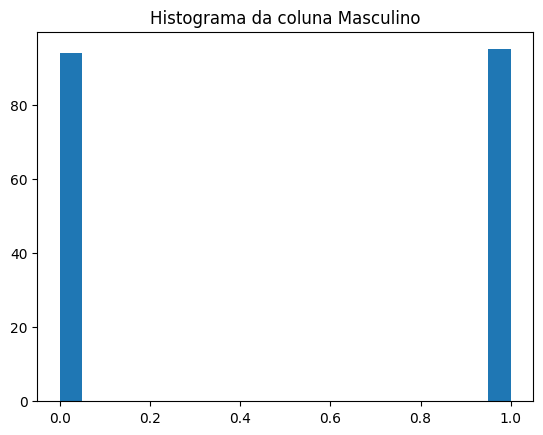

In [9]:
#Observando a distribuição de todas as variáveis usando histograma
colunas = df_limpa.columns

for col in colunas:
    plt.figure()
    plt.title(f"Histograma da coluna {col}")
    plt.hist(df_limpa[col], bins = 20)
    plt.show()

### Observando a distribuições nota-se alguns pontos interessantes e pontos problemáticos:
##### **Pontos interessantes:**
1º: Há uma distribuição quase igualitária de pessoas do gênero feminino e masculino no dataframe. Isso vai ser importante para evitar problemas de generalização do modelo, além de torná-lo capaz de interpretar as relações entre outras variáveis e o gênero de forma a minimizar o viés.

2º: Há uma boa distribuição da variável renda, com uma concentração maior de dados nas faixas de renda mais baixa, indicando que a coleta de dados está atingindo usuários de todas as classes sociais. 

3º: A variável idade apresenta uma característica singular. Ela inicia nos 18 anos, provavelmente indicando que o site não aceita que menores se cadastrem, e se limita à 59. Isso não parece fazer muito sentido. Apesar disso a distribuição é relativamente uniforme em todas as faixas etárias, o que aumenta a variância total e faz com que o nosso modelo se torne menos viesado.

4º: A variável tempo no site, pós tratamento, também tem uma distribuição uniforme.

##### **Pontos problemáticos:**
1º: Há um desbalanceamento da classe alvo, Compra, isso pode gerar um certo viés em modelos mais sofisticados não paramétricos. 


Observando correlações das variáveis com o alvo e entre as variáveis. 

OBS: Afim de realizar as correlações de maneira ideal, eu transformei as variáveis Anúncio Clicado e Gênero em dummies.

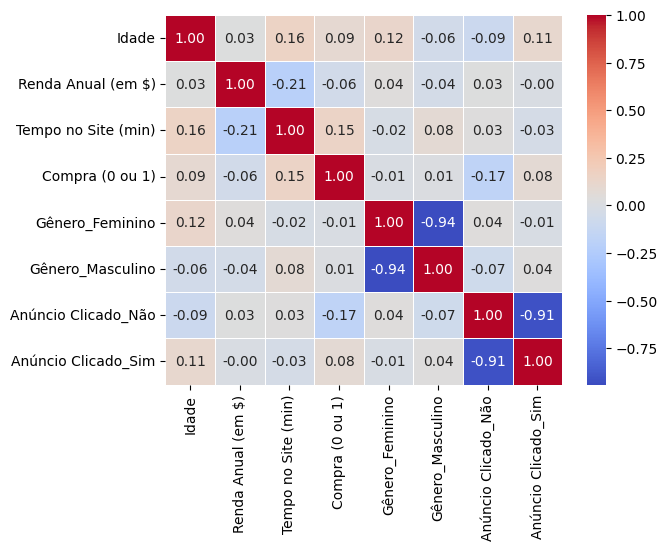

In [10]:
df_dummy = df[df['Tempo no Site (min)'] > 0].copy()
df_dummy = pd.get_dummies(df_dummy, columns=['Gênero', 'Anúncio Clicado'], drop_first=False)

corr = df_dummy.corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

Não há grandes correlações entre as variáveis, sendo a mais forte delas uma correlação negativa entre a variável tempo no site e renda anual. Indicando que pode haver uma relação fraca entre o tempo que o usuário passa rodando pelo site e a sua renda. Se extrapolarmos ao limite pode indicar talvez que o usuário com faixa de renda menor passa mais tempo procurando por ítens com desconto ou algo do tipo, enquanto aquele mais rico tende a executar a compra mais rapidamente.

Além claro da correlação quase perfeita entre as variáveis dummmy, só não perfeita pois ainda há valores NaN. Mas essa era uma correlação que se esperava ser perfeitamente inversa.

Há uma correlação muito fraca entre a compra e o tempo no site, ou seja, pessoas que passam mais tempo no site tendem a virar compradores.

No geral não há muita correlação entre as variáveis.

# ***Pré Processamento***

Realizar um pré-processamento para aumentar a eficácia dos modelos de Machine Learning e imputar as variáveis faltantes.

## **SUMÁRIO**
    1º: Validando o KNN Imputer
    2º: Pré-processando.
    3º: Comparando modelos usando testes estatísticos e cross validation.
    

Visto a variedade de escalas usadas nos dados, alguns representando idades que vão de 18 a 59, outro representando tempo. Faz-se necessário escalonar essas variáveis em desvios padrões. Antes disso irei validar se a abordagem de imputar os valores com KNN pode funcionar por meio de criar 20% de dados vazios em algumas linhas e comparar com os dados reais.

Imputando para K = 1
Imputando para K = 2
Imputando para K = 3
Imputando para K = 4
Imputando para K = 5
Imputando para K = 6
Imputando para K = 7
Imputando para K = 8
Imputando para K = 9
Imputando para K = 10
Imputando para K = 11
Imputando para K = 12
Imputando para K = 13
Imputando para K = 14
Imputando para K = 15
Imputando para K = 16
Imputando para K = 17
Imputando para K = 18
Imputando para K = 19
Imputando para K = 20


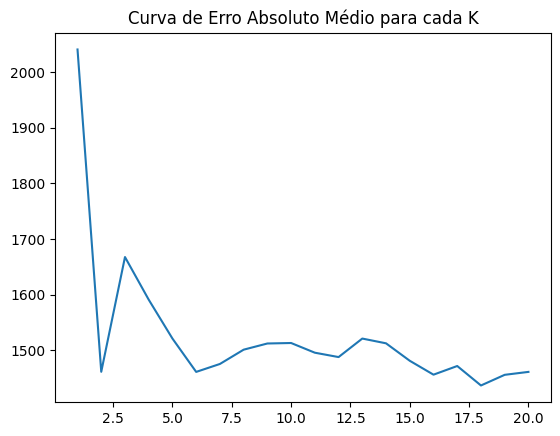

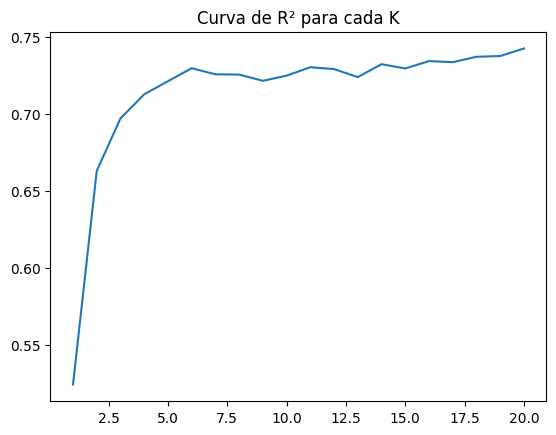

,K,R2,MAE
0,1,0.524534,2041.042828
1,2,0.663149,1460.914017
2,3,0.697196,1667.425836
3,4,0.712829,1590.689855
4,5,0.721298,1520.708881
5,6,0.729769,1460.697907
6,7,0.725789,1474.981537
7,8,0.725632,1500.695132
8,9,0.721572,1511.826835
9,10,0.724942,1512.701167


In [34]:
df_knn_imputer = df_limpa.copy().dropna().drop(columns=['Compra (0 ou 1)'])
df_train, df_test = train_test_split(df_knn_imputer, test_size=0.3, random_state=42)

# Criar valores ausentes no conjunto de teste
np.random.seed(42)
missing_mask = np.random.rand(*df_test.shape) < 0.2
X_test_nan = df_test.copy()
X_test_nan[missing_mask] = np.nan

# Função para avaliar o imputador
def evaluate_imputer(X_train, X_real, X_with_nan, k_values):
    errors = {'K': [], 'R2': [], 'MAE': []}
    for k in k_values:
        print(f"Imputando para K = {k}")
        imputer = KNNImputer(n_neighbors=k)
        
        imputer.fit(X_train)
        X_imputed = imputer.transform(X_with_nan)
        
        # Calcular métricas de avaliação
        mae = mean_absolute_error(X_real, X_imputed)
        r2 = r2_score(X_real, X_imputed)
        
        errors['K'].append(k)
        errors['MAE'].append(mae)
        errors['R2'].append(r2)
    
    return pd.DataFrame(errors)

k_values = range(1, 21)
error_results = evaluate_imputer(df_train, df_test, X_test_nan, k_values)

# Plotar as métricas
plt.figure()
plt.title("Curva de Erro Absoluto Médio para cada K")
plt.plot(error_results['K'], error_results['MAE'])
plt.show()

plt.figure()
plt.title("Curva de R² para cada K")
plt.plot(error_results['K'], error_results['R2'])
plt.show()

error_results

Considerei que o imputer foi bem sucedido e escolhi K = 6 para imputar os dados reais, dado que nele há uma diminuição grande do MAE e já representa um ponto de máximo aumento de R². Além de ser computacionalmente mais eficiente e não aparentar ser um overfitting completo como K = 20

In [12]:
colunas_numericas = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']

X = df_limpa.drop(columns=['Compra (0 ou 1)'])
Y = df_limpa.loc[:,['Compra (0 ou 1)']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

imputer = KNNImputer(n_neighbors=6)
scaler = StandardScaler()

X_train_pp = imputer.fit_transform(X_train)
X_test_pp = imputer.transform(X_test)

X_train_imputed = pd.DataFrame(X_train_pp, columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(X_test_pp, columns=X_test.columns, index=X_test.index)

scaler = StandardScaler()
X_train_imputed[colunas_numericas] = scaler.fit_transform(X_train_imputed[colunas_numericas])
X_test_imputed[colunas_numericas] = scaler.transform(X_test_imputed[colunas_numericas])

X_train_imputed


,Idade,Renda Anual (em $),Tempo no Site (min),Anúncio Clicado,Masculino
5,-1.156489,0.455086,-1.182097,1.0,0.0
139,0.915536,0.059946,0.610437,1.0,1.0
124,0.038910,-1.125473,1.259663,1.0,0.0
172,0.357683,-1.125473,-0.390427,1.0,0.0
85,1.632775,-1.125473,-0.585845,0.0,0.0
...,...,...,...,...,...
106,-1.236182,-1.125473,-1.307825,1.0,1.0
14,0.038910,0.455086,1.512264,0.0,1.0
92,-1.475262,-0.335193,-1.400507,1.0,1.0
184,1.553082,-0.335193,-0.446301,1.0,0.0


Agora que os dados já estão pré-processados já podemos ir para a parte da modelagem e comparação entre modelos. Serão comparados os algoritmos: Random Forest, SVM e Regressão Logística. A comparação será pelo crossvalidation com 10 folds e usando do teste Anova com o teste pos-hoc de Tukey podemos saber quais modelos são estatisticamente diferenciáveis e observando as diferenças nas médias, avaliar qual é superior.

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12

ANOVA Accuracy: F_onewayResult(statistic=np.float64(5.559547738693465), pvalue=np.float64(0.005343289128804766))
ANOVA Precision: F_onewayResult(statistic=np.float64(2.1644027757271513), pvalue=np.float64(0.12096205521461913))
ANOVA Recall: F_onewayResult(statistic=np.float64(7.6514657980456064), pvalue=np.float64(0.0008688724968671608))
ANOVA F1 F_onewayResult(statistic=np.float64(4.758890782969317), pvalue=np.float64(0.01093121864401563)) 


model_1 = RandomForestClassifier()
model_2 = LogisticRegression() 
model_3 = DecisionTreeClassifier()

Teste de Tukey Acurácia:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
model_1 model_2   0.0133 0.9473  -0.088  0.1147  False
model_1 model_3  -0.1156 0.0214 -0.2169 -0.0142   True
model_2 model_3  -0.1289 0.0089 -0.2303 -0.0275   True
------------------------------------------------------

Teste de Tukey Precisão:
  Multiple C

/tmp/ipykernel_1940/4032317316.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(resultados_accuracy, labels=[f'{models[i].__class__.__name__}' for i in range(len(models))])
/tmp/ipykernel_1940/4032317316.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(resultados_precision, labels=[f'{models[i].__class__.__name__}' for i in range(len(models))])
/tmp/ipykernel_1940/4032317316.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(resultados_recall, labels=[f'{models[i].__class__.__name__}' for i in range(len(models))])
/tmp/ipykernel_1940/4032317316.py:83: Matplotli

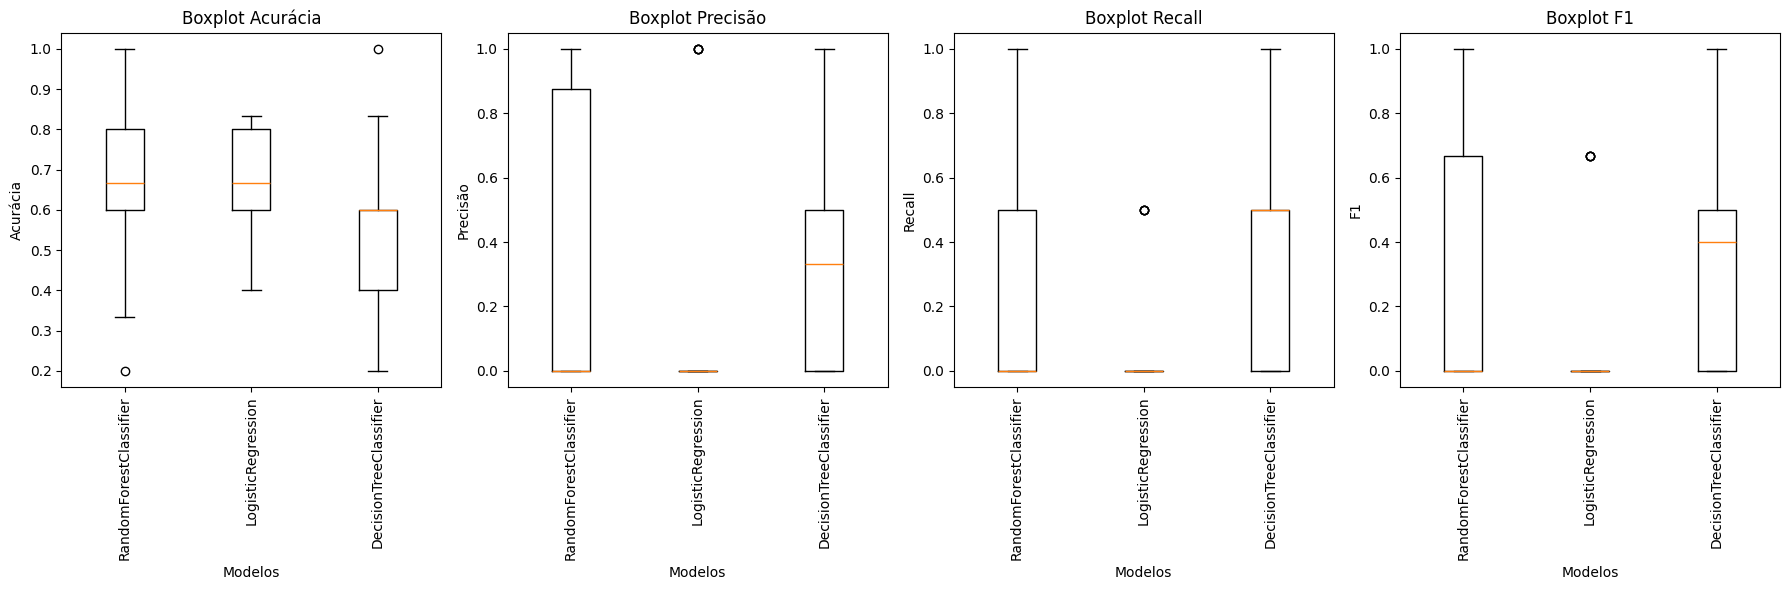

In [32]:
rf = RandomForestClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()

models = [rf, lr, dt]
scoring = ['accuracy', 'precision', 'recall', 'f1']

def diferenca_modelos(X_train, y_train, cv, models):

    if not isinstance(models, list):
        raise TypeError("O argumento 'models' deve ser uma lista.")
   
    resultados_accuracy = []
    resultados_precision = []
    resultados_recall = []
    resultados_f1 = []
   
    for model in models:
        scores_r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        resultados_accuracy.append(scores_r2)
       
        scores_mse = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision', n_jobs=-1)
        resultados_precision.append(scores_mse)
       
        scores_mae = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
        resultados_recall.append(scores_mae)
        
        scores_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
        resultados_f1.append(scores_f1)
        
    anova_accuracy = f_oneway(*resultados_accuracy)
    anova_precision = f_oneway(*resultados_precision)
    anova_recall = f_oneway(*resultados_recall)
    anova_f1 = f_oneway(*resultados_f1)
   
    print("ANOVA Accuracy:", anova_accuracy)
    print("ANOVA Precision:", anova_precision)
    print("ANOVA Recall:", anova_recall)
    print("ANOVA F1", anova_f1, "\n\n")
   
    resultados_accuracy_flat = np.concatenate(resultados_accuracy)
    resultados_precision_flat = np.concatenate(resultados_precision)
    resultados_recall_flat = np.concatenate(resultados_recall)
    resultados_f1_flat = np.concatenate(resultados_f1)
   
    grupos_accuracy = np.array([[f'model_{i+1}'] * len(resultados_accuracy[i]) for i in range(len(models))]).flatten()
    grupos_precision = np.array([[f'model_{i+1}'] * len(resultados_precision[i]) for i in range(len(models))]).flatten()
    grupos_recall = np.array([[f'model_{i+1}'] * len(resultados_recall[i]) for i in range(len(models))]).flatten()
    grupos_f1 = np.array([[f'model_{i+1}'] * len(resultados_f1[i]) for i in range(len(models))]).flatten()
   
    tukey_accuracy = pairwise_tukeyhsd(resultados_accuracy_flat, grupos_accuracy)
    tukey_precision = pairwise_tukeyhsd(resultados_precision_flat, grupos_precision)
    tukey_recall = pairwise_tukeyhsd(resultados_recall_flat, grupos_recall)
    tukey_f1 = pairwise_tukeyhsd(resultados_f1_flat, grupos_f1)
   
    print(f"model_1 = {models[0]}\nmodel_2 = {models[1]} \nmodel_3 = {models[2]}")
    print("\nTeste de Tukey Acurácia:\n", tukey_accuracy)
    print("\nTeste de Tukey Precisão:\n", tukey_precision)
    print("\nTeste de Tukey Recall:\n", tukey_recall)
    print("\nTeste de Tukey F1:\n", tukey_f1)
   
    fig, axes = plt.subplots(1, 4, figsize=(18, 6))
   
    axes[0].boxplot(resultados_accuracy, labels=[f'{models[i].__class__.__name__}' for i in range(len(models))])
    axes[0].set_title("Boxplot Acurácia")
    axes[0].set_xlabel("Modelos")
    axes[0].set_ylabel("Acurácia")
    axes[0].set_xticklabels([f'{models[i].__class__.__name__}' for i in range(len(models))], rotation=90)
    
   
    axes[1].boxplot(resultados_precision, labels=[f'{models[i].__class__.__name__}' for i in range(len(models))])
    axes[1].set_title("Boxplot Precisão")
    axes[1].set_xlabel("Modelos")
    axes[1].set_ylabel("Precisão")
    axes[1].set_xticklabels([f'{models[i].__class__.__name__}' for i in range(len(models))], rotation=90)
   
    axes[2].boxplot(resultados_recall, labels=[f'{models[i].__class__.__name__}' for i in range(len(models))])
    axes[2].set_title("Boxplot Recall")
    axes[2].set_xlabel("Modelos")
    axes[2].set_ylabel("Recall")
    axes[2].set_xticklabels([f'{models[i].__class__.__name__}' for i in range(len(models))], rotation=90)
    
    axes[3].boxplot(resultados_f1, labels=[f'{models[i].__class__.__name__}' for i in range(len(models))])
    axes[3].set_title("Boxplot F1")
    axes[3].set_xlabel("Modelos")
    axes[3].set_ylabel("F1")
    axes[3].set_xticklabels([f'{models[i].__class__.__name__}' for i in range(len(models))], rotation=90)
    plt.tight_layout()
    plt.show()

diferenca_modelos(X_train_imputed, Y_train.values.ravel(), 30, models)

Os dados não aparentam estar distribuídos normalmente, muito provavelmente devido a baixa quantidade de dados. Em virtude disso é difícil utilizar um método confiável o suficiente que não fique viesado. Assumindo o teste anterior, ele nos afirma que o Random Forest e a Regressão Logística apresentaram desempenho superior em acurácia contra o Decision Tree. Porém, os dois não são diferenciáveis entre sí. Pela possibilidade de realizar análises paramétricas usando a Regressão Logística e a maior facilidade de interpretar a importância das features, decidi escolher ele para a tarefa.

0.5897435897435898
0.0
0.0
0.0


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


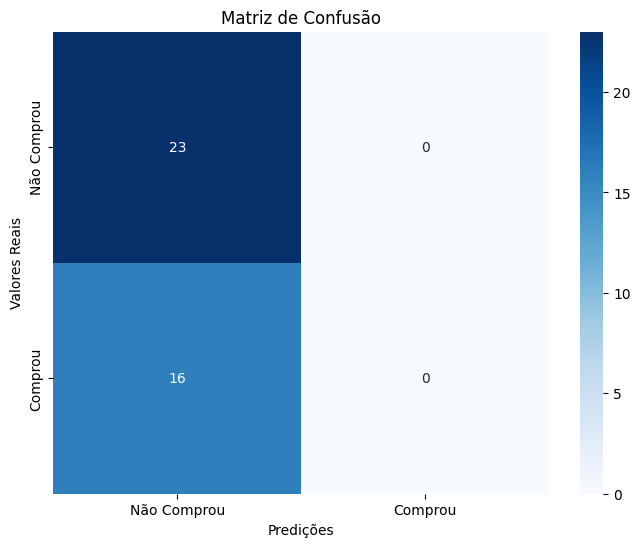

In [50]:
X_train = X_train_imputed.copy()
Y_train_pp = Y_train.values.ravel().copy()

X_test = X_test_imputed.copy()
Y_test_pp = Y_test.values.ravel().copy()

#MODELO ESCOLHIDO REGRESSÃO LOGÍSTICA

lr = LogisticRegression()
lr.fit(X_train, Y_train_pp)

y_pred = lr.predict(X_test_pp)

print(accuracy_score(Y_test_pp, y_pred))
print(f1_score(Y_test_pp, y_pred))
print(recall_score(Y_test_pp, y_pred))
print(precision_score(Y_test_pp, y_pred))
cm = confusion_matrix(Y_test_pp, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Comprou', 'Comprou'], yticklabels=['Não Comprou', 'Comprou'])
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

O modelo não conseguiu encontrar padrões nas features disponíveis para caracterizar um comprador. Ele acabou por dizer que todos os dados não são compradores. Minimizou o Erro Tipo 1 ao extremo. 